In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [3]:
data = pd.read_csv('heart.csv') 

In [6]:
X=data.drop(['target'],axis=1)
y=data['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.25, shuffle=True)

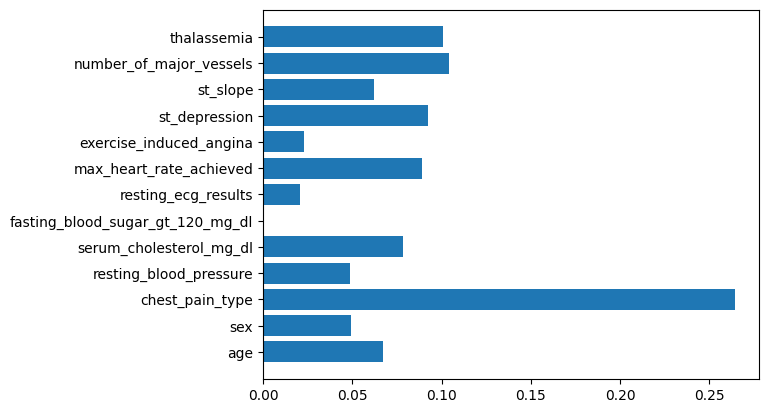

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Derive feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.barh(feature_names,feature_importances)
plt.show()

In [20]:
df = pd.read_csv('adult.csv')

In [21]:
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [22]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

/var/folders/c_/90s1by1x4_11yq3hltwm74040000gp/T/ipykernel_42193/3014946458.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


In [23]:
X_train=df[['age','educational-num','gender','capital-loss','hours-per-week']]
y_train=df['income']

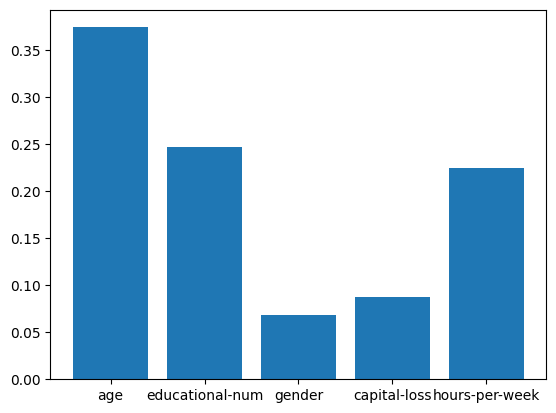

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Derive feature importances
feature_importances = model.feature_importances_
feature_names=X_train.columns
# Plot the feature importances
plt.bar(feature_names,feature_importances)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.25, shuffle=True)

In [35]:
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score


model = DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(X_train, y_train)
print(X_train.columns)
print(y_train)

# Extract the rules
rules = export_text(model, feature_names=list(X_train.columns))
print(rules)

y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol_mg_dl', 'fasting_blood_sugar_gt_120_mg_dl',
       'resting_ecg_results', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'number_of_major_vessels', 'thalassemia'],
      dtype='object')
476     0
455     1
167     1
845     0
1018    0
       ..
654     1
251     1
729     1
705     0
69      0
Name: target, Length: 768, dtype: int64
|--- chest_pain_type <= 0.50
|   |--- number_of_major_vessels <= 0.50
|   |   |--- class: 0
|   |--- number_of_major_vessels >  0.50
|   |   |--- class: 0
|--- chest_pain_type >  0.50
|   |--- st_depression <= 1.95
|   |   |--- class: 1
|   |--- st_depression >  1.95
|   |   |--- class: 0

